In [1]:
# Reload modules automatically
%load_ext autoreload
%autoreload 2


In [10]:
from typing import List, Tuple
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from tqdm.notebook import tqdm
from typing import List, Tuple

# Q2.1

We will define the ODE SIR model.

In [4]:
def model_ode(times, init: List[float], params: List[float]):
    """
    Define the SIR model here
    Args:
        times: time points (not used)
        init: array of initial fractions [S_vax, S_unvax, I_vax, I_unvax, R_vax, R_unvax]
        params: array of parameters [beta, gamma, rho]

    Returns:
        [dS_vaxdt, dS_unvaxdt, dI_vaxdt, dI_unvaxdt, dR_vaxdt, dR_unvaxdt]
    """
    # CODE HERE
    S_vax, S_unvax, I_vax, I_unvax, R_vax, R_unvax = init
    beta, gamma, rho = params
    dS_unvaxdt = -beta*S_unvax*(I_unvax+I_vax)
    dI_unvaxdt = beta*S_unvax*(I_unvax+I_vax)-gamma*I_unvax
    dR_unvaxdt = gamma*I_unvax
    dS_vaxdt = -beta*(1-rho)*S_vax*(I_unvax+I_vax)
    dI_vaxdt = beta*(1-rho)*S_vax*(I_unvax+I_vax)-gamma*(1-rho)*I_vax
    dR_vaxdt = gamma*(1-rho)*I_vax
    return dS_vaxdt, dS_unvaxdt, dI_vaxdt, dI_unvaxdt, dR_vaxdt, dR_unvaxdt

We will solve the ODE model. This is similar to HW1 Q1.

In [5]:
def solve_ode(init, params, t_max, t_step):
    """
    Solve the ODE model
    """
    times = np.arange(0, t_max, t_step)
    sol = solve_ivp(
        lambda t, y: model_ode(t, y, params), [0, t_max], init, t_eval=times
    )
    return sol.t, sol.y

Use `model_ode` and `solve_ode` to generate the plots below.

In [29]:
# CODE HERE
times = np.linspace(0,200,2001)
params = [0.1,0.01,0.3]
init = [0.45,0.45,0.05,0.05,0.0,0.0]
sir_sol = solve_ode(init,params,200,1)
sir_out = pd.DataFrame({"t":sir_sol[0],"S_vax":sir_sol[1][0],"S_unvax":sir_sol[1][1],"I_vax":sir_sol[1][2],"I_unvax":sir_sol[1][3],"R_vax":sir_sol[1][4],"R_unvax":sir_sol[1][5],})

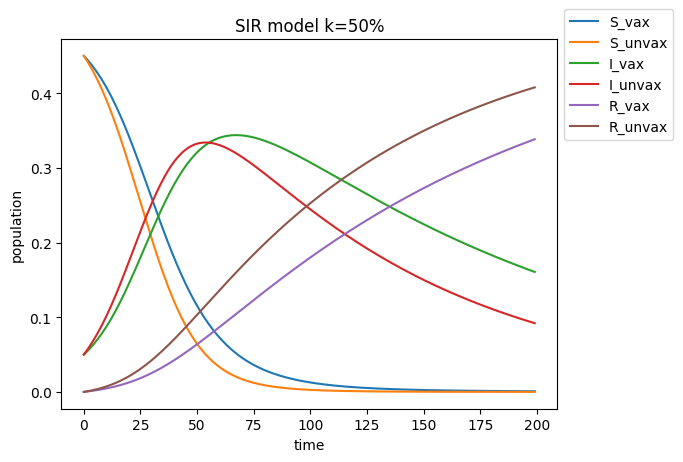

In [32]:
plt.plot('t','S_vax', data=sir_out)
plt.plot('t','S_unvax', data=sir_out)
plt.plot('t','I_vax', data=sir_out)
plt.plot('t','I_unvax', data=sir_out)
plt.plot('t','R_vax', data=sir_out)
plt.plot('t','R_unvax', data=sir_out)
plt.title("SIR model k=50%")
plt.xlabel("time")
plt.ylabel("population")
legend = plt.legend(bbox_to_anchor=(1, 1.1))

In [36]:
sir_out['R_vax'][199]+sir_out['R_unvax'][199]

0.7463228199286038

In [27]:
times = np.linspace(0,200,2001)
params = [0.1,0.01,0.3]
init = [0.09,0.81,0.01,0.09,0.0,0.0]
sir_sol = solve_ode(init,params,200,1)
sir_out_10 = pd.DataFrame({"t":sir_sol[0],"S_vax":sir_sol[1][0],"S_unvax":sir_sol[1][1],"I_vax":sir_sol[1][2],"I_unvax":sir_sol[1][3],"R_vax":sir_sol[1][4],"R_unvax":sir_sol[1][5]})

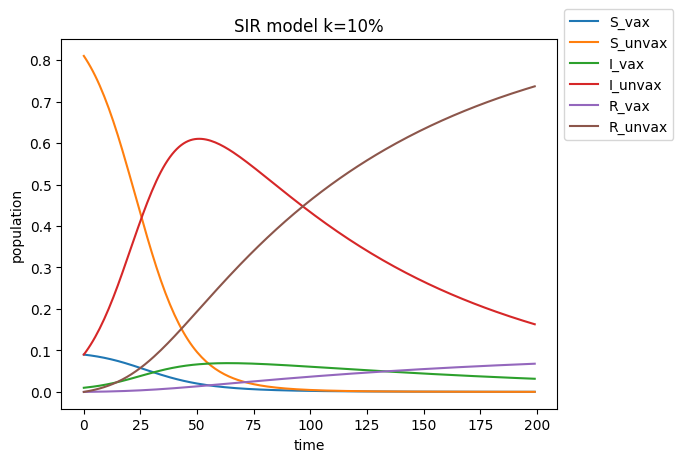

In [28]:
plt.plot('t','S_vax', data=sir_out_10)
plt.plot('t','S_unvax', data=sir_out_10)
plt.plot('t','I_vax', data=sir_out_10)
plt.plot('t','I_unvax', data=sir_out_10)
plt.plot('t','R_vax', data=sir_out_10)
plt.plot('t','R_unvax', data=sir_out_10)
plt.title("SIR model k=10%")
plt.xlabel("time")
plt.ylabel("population")
legend = plt.legend(bbox_to_anchor=(1, 1.1))

In [37]:
sir_out_10['R_vax'][199]+sir_out_10['R_unvax'][199]

0.8047133333921389

# Q2.2
We will implement a stochastic version of the SIR model we defined above.

In [38]:
def stochastic_model_oracle(init: List[float]):
    """
    Define the stochastic model here
    Args:
        init: array of initial fractions [S_vax, S_unvax, I_vax, I_unvax, R_vax, R_unvax]
    Returns:
        r_final: final fraction of recovered individuals
    """
    S_vax, S_unvax, I_vax, I_unvax, R_vax, R_unvax = init
    # CODE HERE
    # First sample the parameters from distributions
    
    # Then solve the ode using code from Q2.1
    
    # Return final R(T)
    beta = np.random.uniform(0.05,0.15)
    gamma = np.random.uniform(0.005,0.015)
    rho = np.random.uniform(0.1,0.3)
    sir_sol = solve_ode(init,params,200,1)
    sir_out_temp = pd.DataFrame({"t":sir_sol[0],"S_vax":sir_sol[1][0],"S_unvax":sir_sol[1][1],"I_vax":sir_sol[1][2],"I_unvax":sir_sol[1][3],"R_vax":sir_sol[1][4],"R_unvax":sir_sol[1][5],})
    return sir_out_temp['R_vax'][199]+sir_out_temp['R_unvax'][199]

For different values of $k$ we will compute $R(T)$.

In [42]:
# CODE HERE
klist = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
rt_list = []
round = 1000
for k in klist:
    init = [0.9*k,0.9-0.9*k,0.1*k,0.1-0.1*k,0.0,0.0]
    rt_temp = []

    for idx in range(round):
        Rt = stochastic_model_oracle(init)
        rt_temp.append(Rt)
    rt_list.append(sum(rt_temp)/len(rt_temp))


0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
[0.8191804702803772, 0.80471333339213, 0.7901923931389863, 0.7756242083311539, 0.7610024003607714, 0.7463228199286134, 0.7315742900311742, 0.716763181936204, 0.7018807815356533, 0.6869231373812796, 0.6719173753764354]


Text(0, 0.5, 'R(T)')

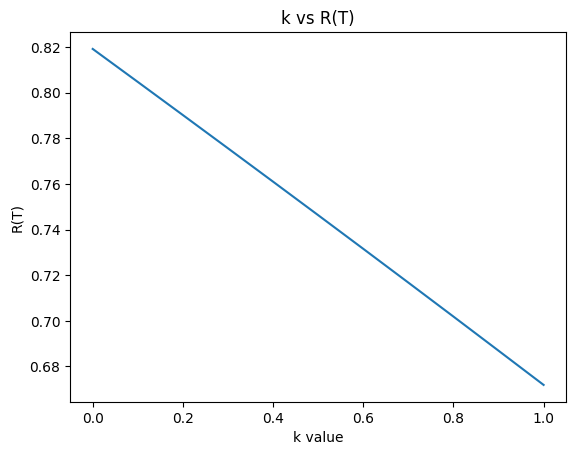

In [43]:
plt.plot(klist,rt_list)
plt.title('k vs R(T)')
plt.xlabel('k value')
plt.ylabel('R(T)')

# Q2.3
We will first implement the cost function using `stochastic_model_oracle`.

In [45]:
def cost_function(arm_no: float) -> float:
    """
    Return the cost function for the arm by running one simulation of stochastic_model_oracle
    Args:
        arm_no: arm number from 0-9
    Returns:
        cost: cost of running the arm
    """
    assert arm_no in list(range(10))
    # CODE HERE
    # Compute initial fractions based on the arm
    
    # Pass it to stochastic_model_oracle and get R(T)
    
    # Compute and return the reward
    init = [0.9*arm_no*0.1,0.9-0.9*arm_no*0.1,0.1*arm_no*0.1,0.1-0.1*arm_no*0.1,0.0,0.0]
    Rt = stochastic_model_oracle(init)
    S_vax = 0.9*arm_no*0.1
    I_vax = 0.1*arm_no*0.1
    return 8 * (S_vax+I_vax) + 10*Rt

# Q2.4
We will now implement the MAB algorithm.
We have provided the basic skeleton og the algorithm in `run_bandit` function.
You just need to implement the strategies and perform the experiments multiple times to get the average costs.


In [58]:
def run_bandit(policy, params, max_time):
    """
    Run the bandit algorithm
    Args:
        policy: bandit algorithm
        params: parameters for the bandit algorithm
        max_time: number of time-steps
    Returns:
        cost: cost at each time-step
        V: value estimate of each arm at each time-step
    """
    cost = np.zeros(max_time)
    V = np.zeros(10)
    N = np.zeros(10)
    for t in range(max_time):
        arm = policy(*params, V)
        cost[t] = cost_function(arm)
        N[arm] += 1
        V[arm] += (cost[t] - V[arm]) / N[arm]
    return cost, V


Now complete the functions below to implement the strategies.

In [70]:
def epsilon_greedy(epsilon: float, V: np.ndarray) -> int:
    """Epsilon greedy policy
    Args:
        epsilon: probability of exploration
        V: value estimate of each arm
    Returns:
        arm: arm to pull
    """
    # CODE HERE
    random_num = np.random.rand()
    if random_num < epsilon:
        arm = np.random.choice(10,1)[0]
    else:
        arm_list = list(range(10))
        arm = arm_list[np.where(V == np.amin(V))[0][0]]
    return arm

def softmax(temperature: float, V: np.ndarray) -> int:
    """Softmax policy
    Args:
        temperature: temperature parameter
        V: value estimate of each arm
    Returns:
        arm: arm to pull
    """
    # CODE HERE
    arm_list = list(range(10))
    prob = []
    sumV = 0
    for k in range(len(V)):
        sumV += np.exp(-V[k]/temperature)
    for k in range(len(V)):
        prob.append(np.exp(-V[k]/temperature)/sumV)
    arm = np.random.choice(arm_list, 1, p=prob)
    return arm


In [76]:
# CODE HERE
#epsilon_greedy
run_num = 1000
cost1000 = []
for i in range(run_num):
    cost, V =  run_bandit(epsilon_greedy, [0.1], 100)
    cost1000.append(cost)
epsilon_out = pd.DataFrame({"t":list(range(1,101)),"cost":[sum(x)/run_num for x in zip(*cost1000)]})

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [77]:
run_num = 1000
cost1000_softmax = []
for i in range(run_num):
    cost, V =  run_bandit(softmax, [1], 100)
    cost1000_softmax.append(cost)
softmax_out = pd.DataFrame({"t":list(range(1,101)),"cost":[sum(x)/run_num for x in zip(*cost1000_softmax)]})

C:\Users\Zun Wang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_ivp\base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


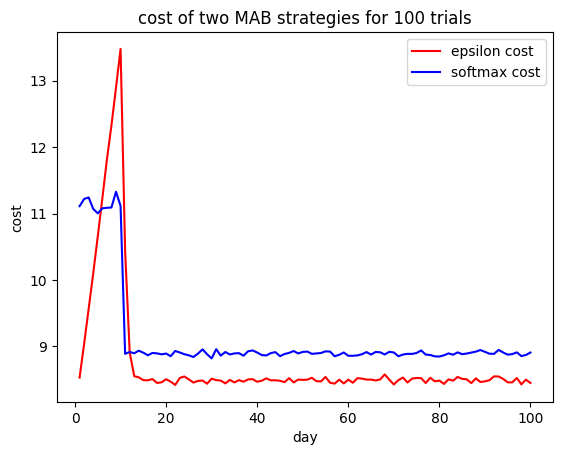

In [107]:
my_label = ['epsilon cost','softmax cost']
plt.plot('t','cost', color='red', data=epsilon_out)
plt.plot('t','cost', color='blue', data=softmax_out)
plt.title("cost of two MAB strategies for 100 trials")
plt.xlabel('day')
plt.ylabel('cost')
legend=plt.legend(labels=my_label)
plt.savefig('2.4.png')

Epsilon greedy is performing better after 15 days, the cost is constantly lower than softmax afterwards.

# Q 2.5
Now plot the avergae $V(k)$ for all arms for both strategies.

In [ ]:
# CODE HERE

In [92]:
run_num = 1000
V1000 = []
for i in range(run_num):
    cost, V =  run_bandit(epsilon_greedy, [0.1], 100)
    V1000.append(V)
epsilon_out_V = pd.DataFrame({"k":list(range(10)),"V":[sum(x)/run_num for x in zip(*V1000)]})

[ 8.1918047   8.84713333  9.50192393  8.1918047  10.15624208 10.810024
 11.4632282  12.1157429  12.76763182 13.41880782 14.06923137  8.1918047
  8.1918047   8.1918047   8.1918047   8.1918047   8.1918047   8.1918047
  8.1918047  11.4632282   8.1918047  10.810024    8.1918047   8.1918047
  8.1918047   8.1918047   8.1918047   8.1918047   8.1918047   8.1918047
  8.1918047  12.76763182  8.1918047   8.1918047   8.1918047   8.1918047
  8.1918047   8.1918047   8.1918047   8.1918047   8.1918047   8.1918047
  8.1918047   8.1918047   8.1918047   8.1918047   8.1918047  13.41880782
  8.1918047   8.1918047   8.1918047  12.76763182  8.1918047   8.1918047
 12.1157429   8.1918047   8.1918047   8.1918047   8.1918047   8.1918047
  8.1918047   9.50192393 14.06923137  8.1918047   8.1918047   8.1918047
  8.1918047   8.1918047   8.1918047   8.1918047   8.84713333  8.1918047
  8.1918047   8.1918047   8.1918047   8.1918047   8.1918047   8.1918047
  8.1918047   8.1918047   8.1918047   8.1918047   8.1918047  10.

In [91]:
run_num = 1000
V1000_softmax = []
for i in range(run_num):
    cost, V =  run_bandit(softmax, [1], 100)
    V1000_softmax.append(V)
softmax_out_V = pd.DataFrame({"k":list(range(10)),"V":[sum(x)/run_num for x in zip(*V1000_softmax)]})

[ 8.1918047   8.84713333  9.50192393 10.15624208 10.810024   11.4632282
 12.1157429  12.76763182 13.41880782 14.06923137]
[ 8.1918047   8.84713333  9.50192393 10.15624208 10.810024   11.4632282
 12.1157429  12.76763182 13.41880782 14.06923137]
[ 8.1918047   8.84713333  9.50192393 10.15624208 10.810024   11.4632282
 12.1157429  12.76763182 13.41880782 14.06923137]
[ 8.1918047   8.84713333  9.50192393 10.15624208 10.810024   11.4632282
 12.1157429  12.76763182 13.41880782 14.06923137]
[ 8.1918047   8.84713333  9.50192393 10.15624208 10.810024   11.4632282
 12.1157429  12.76763182 13.41880782 14.06923137]
[ 8.1918047   8.84713333  9.50192393 10.15624208 10.810024   11.4632282
 12.1157429  12.76763182 13.41880782 14.06923137]
[ 8.1918047   8.84713333  9.50192393 10.15624208 10.810024   11.4632282
 12.1157429  12.76763182 13.41880782 14.06923137]
[ 8.1918047   8.84713333  9.50192393 10.15624208 10.810024   11.4632282
 12.1157429  12.76763182 13.41880782 14.06923137]
[ 8.1918047   8.84713333

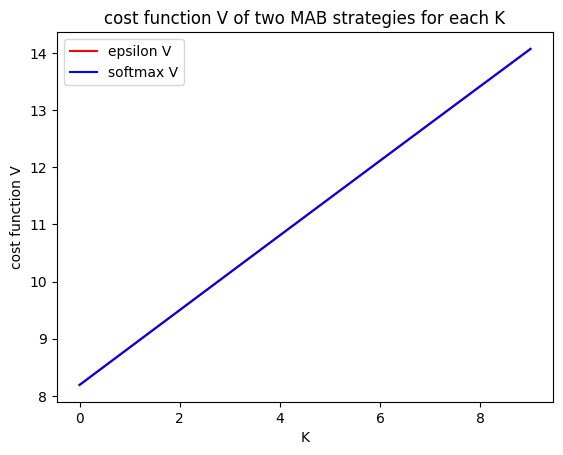

In [108]:
my_label = ['epsilon V','softmax V']
plt.plot('k','V', color='red', data=epsilon_out_V)
plt.plot('k','V', color='blue', data=softmax_out_V)
plt.title("cost function V of two MAB strategies for each K")
plt.xlabel('K')
plt.ylabel('cost function V')
legend=plt.legend(labels=my_label)
plt.savefig('2.5.png')